# Particle insertion into a disperse brush

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import custom package
import brush as b
from config import FIGURE_SIZE_LARGE, FIGURE_DPI, nature_colors

In [4]:
# Load simulation density profiles
osmotic_prefactor = 1.0
brush_10 = b.Brush("simulation",
                   {"filename": "../data/Density_Profile_D100.csv"},
                   osmotic_prefactor=osmotic_prefactor)
brush_11 = b.Brush("simulation",
                   {"filename": "../data/Density_Profile_D110.csv"},
                   osmotic_prefactor=osmotic_prefactor)
brush_12 = b.Brush("simulation",
                   {"filename": "../data/Density_Profile_D120.csv"},
                   osmotic_prefactor=osmotic_prefactor)
brush_14 = b.Brush("simulation",
                   {"filename": "../data/Density_profile_D140.csv"},
                   osmotic_prefactor=osmotic_prefactor)

## Inserting a small particle

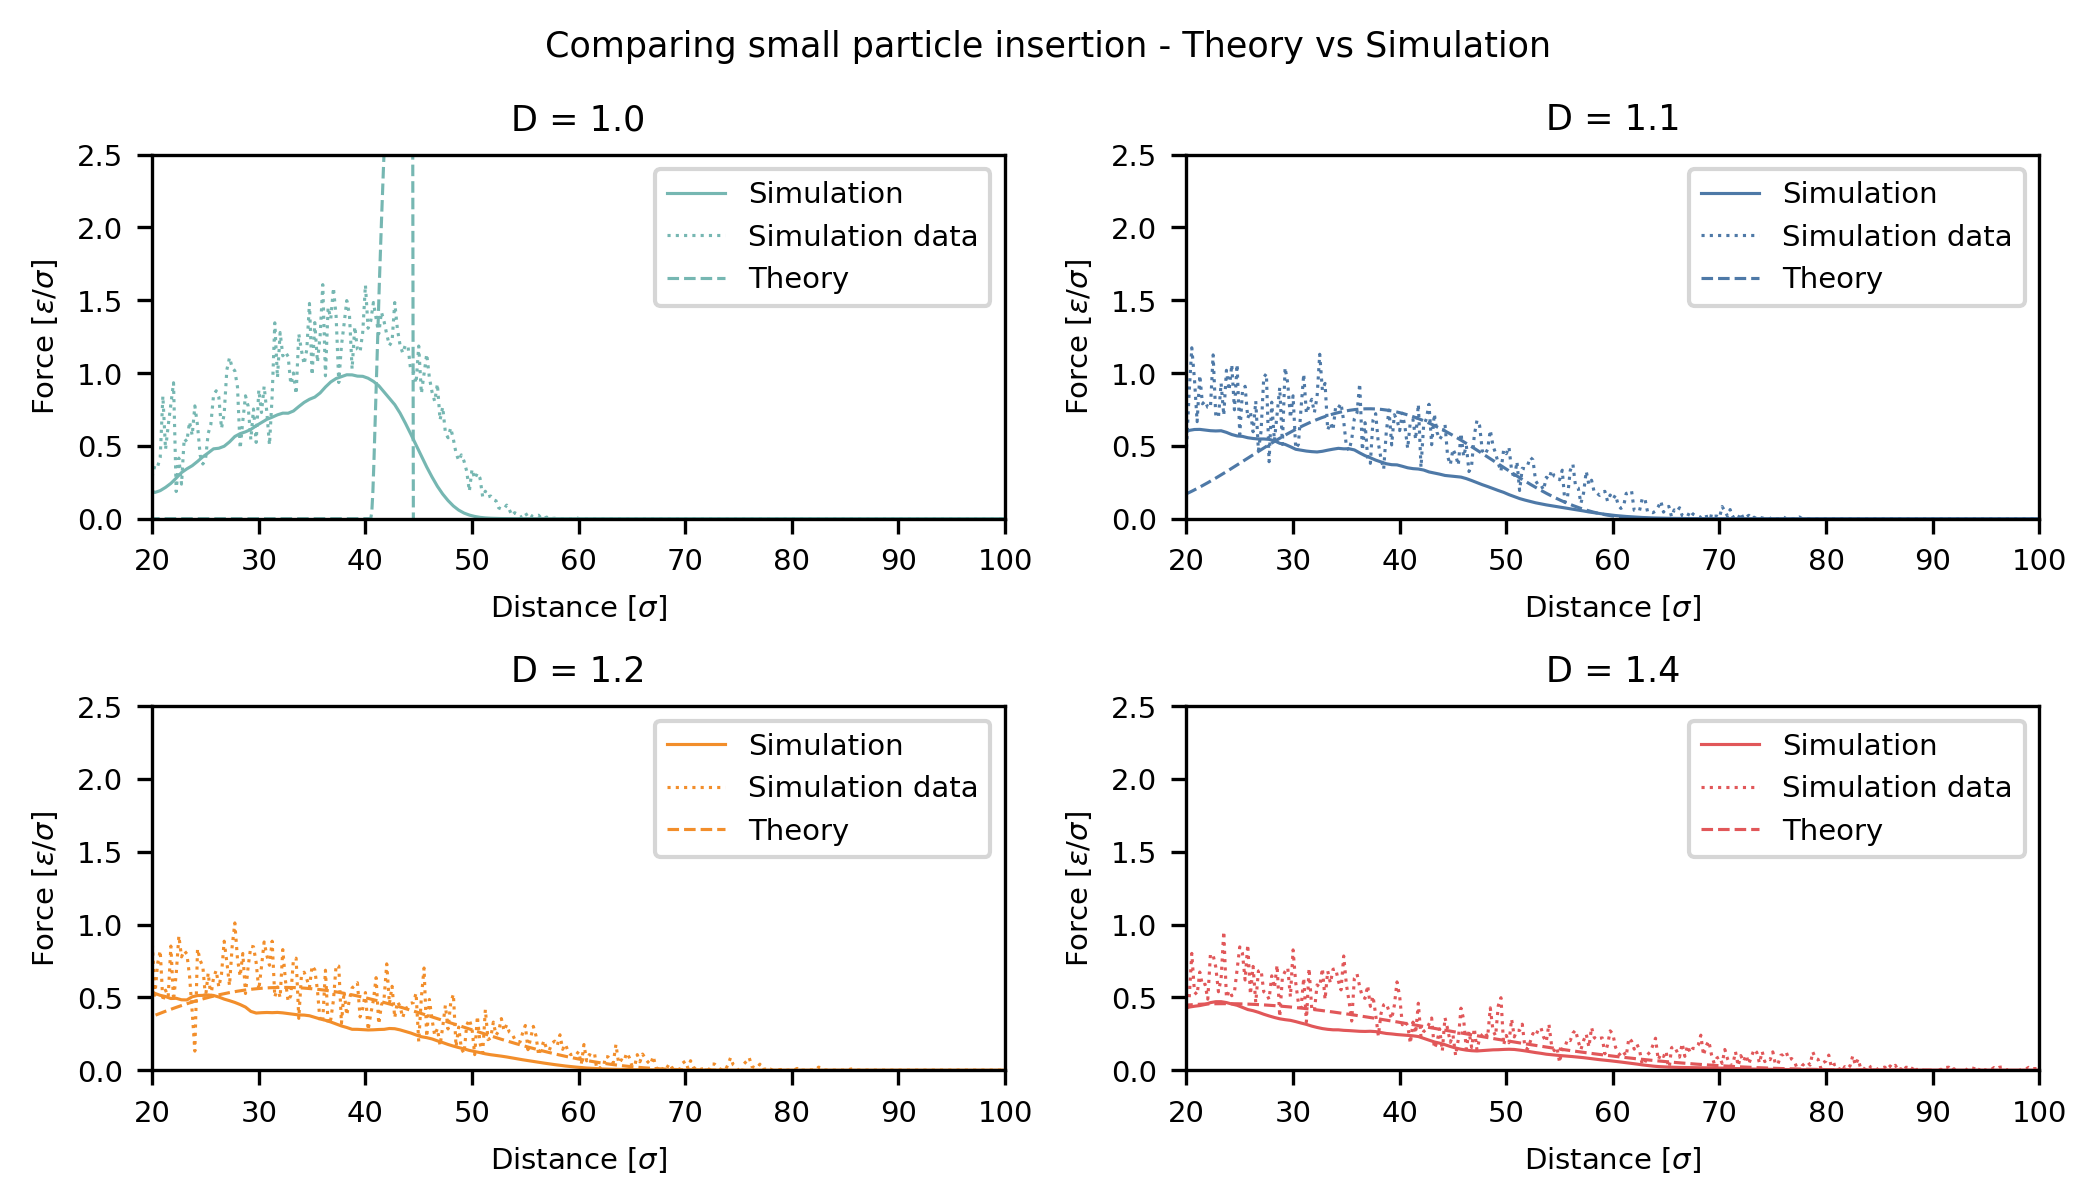

In [7]:
#Insert particle
beta = 0.00
radius = 1.0*np.sqrt(10)
brush_10.insert_particle(beta=beta,radius=radius)
brush_11.insert_particle(beta=beta,radius=radius)
brush_12.insert_particle(beta=beta,radius=radius)
brush_14.insert_particle(beta=beta,radius=radius)

# Generate theoretical profiles and insert particle
brush_10_th = b.Brush("model",
                      {"type" : "gaussian",
                       "Mn" : 100,
                       "sigma" : 0.1})
brush_10_th.insert_particle(beta=beta,radius=radius)
brush_11_th = b.Brush("model",
                      {"type": "schulz-zimm",
                       "Mn" : 100,
                       "D" : 1.1})
brush_11_th.insert_particle(beta=beta,radius=radius)
brush_12_th = b.Brush("model",
                      {"type": "schulz-zimm",
                       "Mn" : 100,
                       "D" : 1.2})
brush_12_th.insert_particle(beta=beta,radius=radius)
brush_14_th = b.Brush("model",
                      {"type": "schulz-zimm",
                       "Mn" : 100,
                       "D" : 1.4})
brush_14_th.insert_particle(beta=beta,radius=radius)

OFFSET = 0

fig, ax = plt.subplots(figsize=FIGURE_SIZE_LARGE, dpi=FIGURE_DPI,ncols=2,nrows=2)

ax[0][0].plot(brush_10.z, brush_10.insertion_force, "-", label='Simulation', color=nature_colors[3])
data = pd.read_csv("../data/Small_Particle_D100.csv")
ax[0][0].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[3])
brush_10.insert_particle(beta=beta,radius=radius)
ax[0][0].plot(brush_10_th.z,brush_10_th.insertion_force,'--', label='Theory', color=nature_colors[3])
ax[0][0].set_title("D = 1.0")

ax[0][1].plot(brush_11.z, brush_11.insertion_force, "-", label='Simulation', color=nature_colors[0])
data = pd.read_csv("../data/Small_Particle_D110.csv")
ax[0][1].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[0])
brush_11.insert_particle(beta=beta,radius=radius)
ax[0][1].plot(brush_11_th.z,brush_11_th.insertion_force,'--', label='Theory', color=nature_colors[0])
ax[0][1].set_title("D = 1.1")


ax[1][0].plot(brush_12.z, brush_12.insertion_force, "-", label='Simulation', color=nature_colors[1])
data = pd.read_csv("../data/Small_Particle_D120.csv")
ax[1][0].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[1])
brush_12.insert_particle(beta=beta,radius=radius)
ax[1][0].plot(brush_12_th.z,brush_12_th.insertion_force,'--', label='Theory', color=nature_colors[1])
ax[1][0].set_title("D = 1.2")


ax[1][1].plot(brush_14.z, brush_14.insertion_force, "-", label='Simulation', color=nature_colors[2])
data = pd.read_csv("../data/Small_Particle_D140.csv")
ax[1][1].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[2])
brush_14.insert_particle(beta=beta,radius=radius)
ax[1][1].plot(brush_14_th.z,brush_14_th.insertion_force,'--', label='Theory', color=nature_colors[2])
ax[1][1].set_title("D = 1.4")


for i, ax in enumerate(fig.axes):
    ax.set_ylabel(str(i))
    ax.set_xlim([20,100])
    ax.set_xlabel("Distance [$\sigma$]")
    ax.set_ylim([0,2.5])
    ax.set_ylabel("Force [$\epsilon/\sigma$]")
    ax.legend()
    
fig.suptitle("Comparing small particle insertion - Theory vs Simulation")
fig.tight_layout()


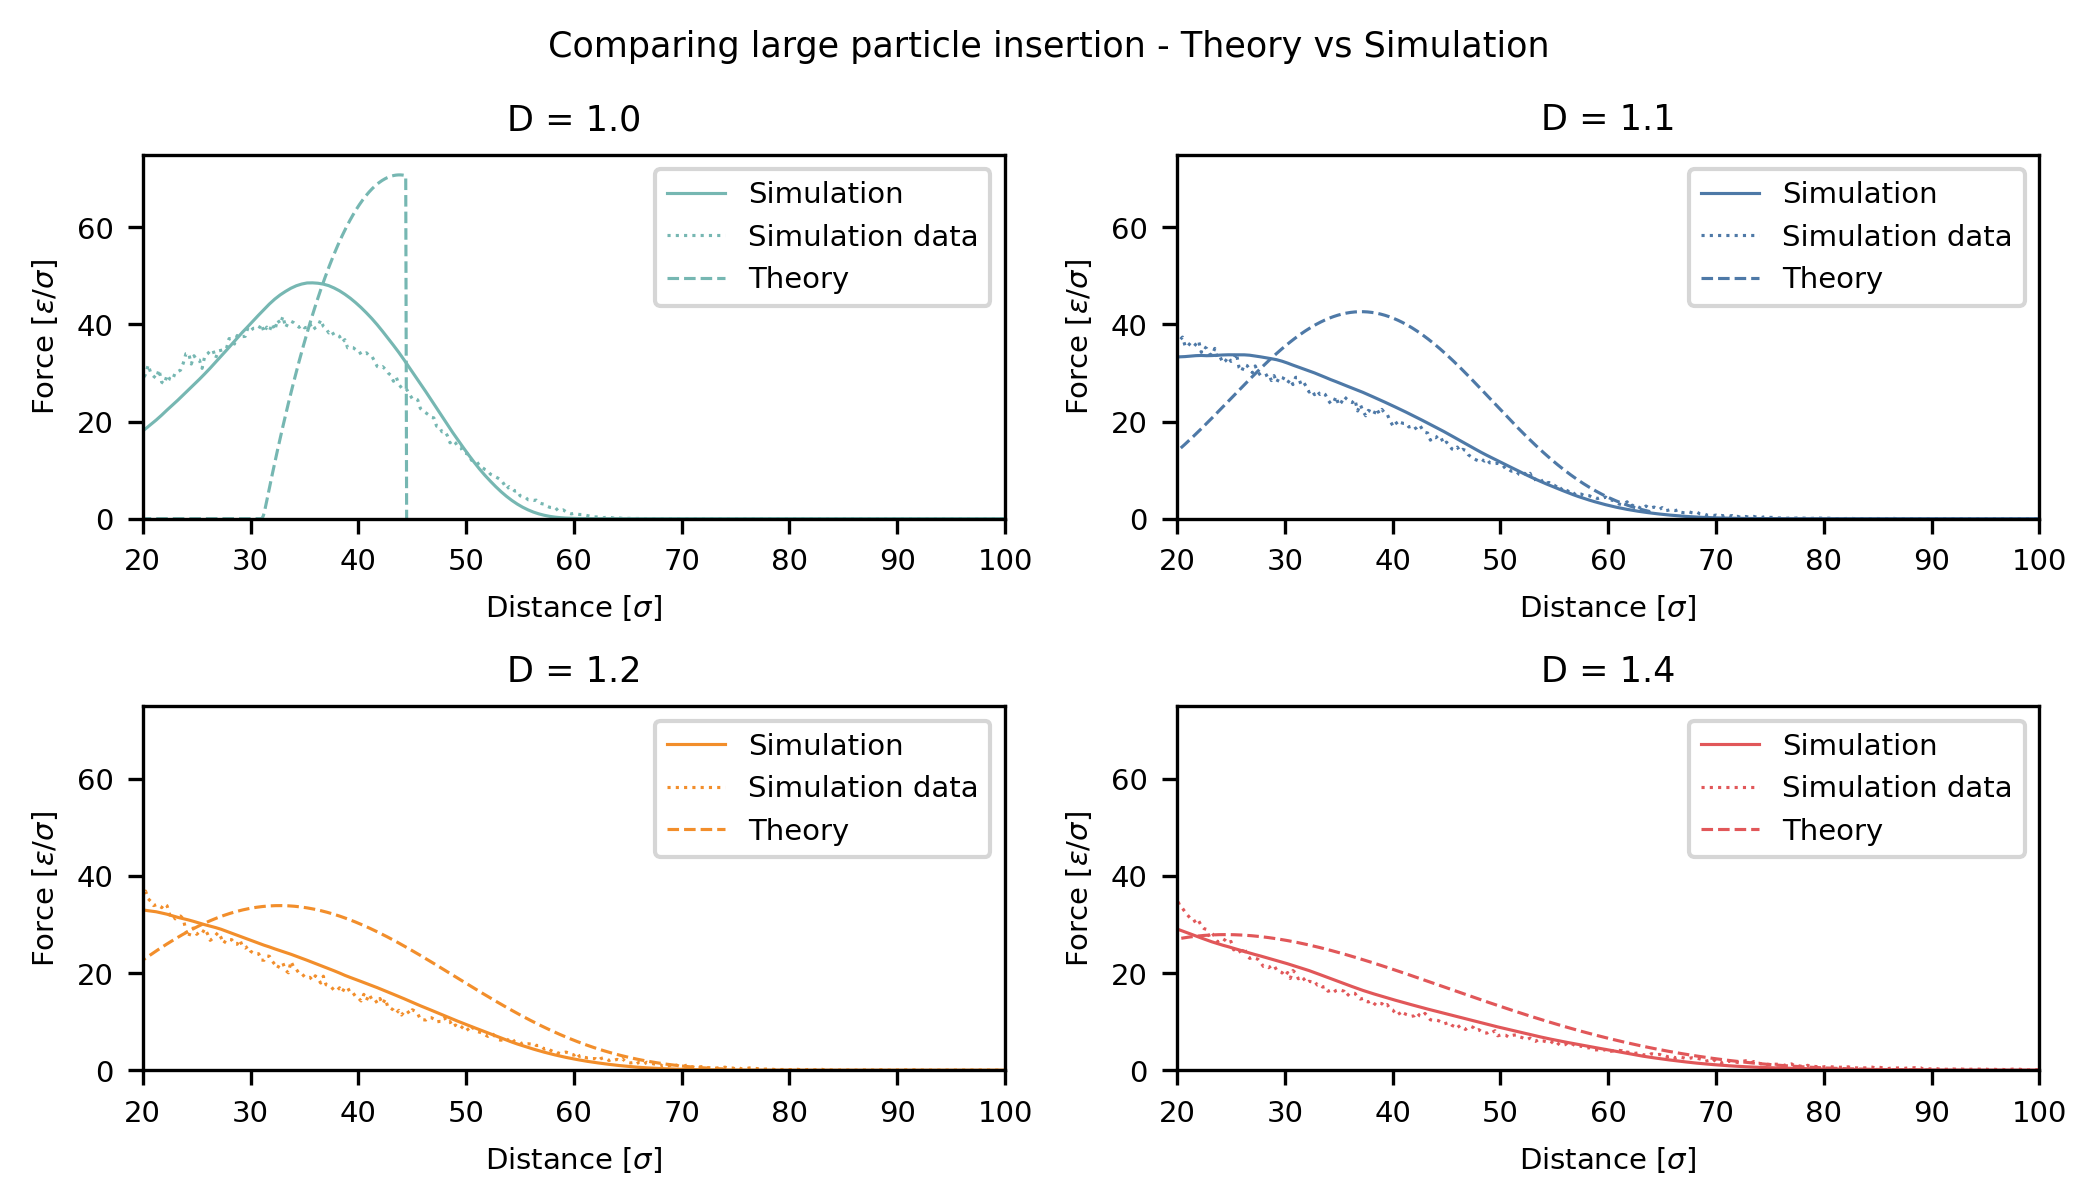

In [16]:
#Insert particle
beta = 0.00
radius = 4.0*np.sqrt(10)
brush_10.insert_particle(beta=beta,radius=radius)
brush_11.insert_particle(beta=beta,radius=radius)
brush_12.insert_particle(beta=beta,radius=radius)
brush_14.insert_particle(beta=beta,radius=radius)

# Generate theoretical profiles and insert particle
brush_10_th = b.Brush("model",
                      {"type" : "gaussian",
                       "Mn" : 100,
                       "sigma" : 0.1})
brush_10_th.insert_particle(beta=beta,radius=radius)
brush_11_th = b.Brush("model",
                      {"type": "schulz-zimm",
                       "Mn" : 100,
                       "D" : 1.1})
brush_11_th.insert_particle(beta=beta,radius=radius)
brush_12_th = b.Brush("model",
                      {"type": "schulz-zimm",
                       "Mn" : 100,
                       "D" : 1.2})
brush_12_th.insert_particle(beta=beta,radius=radius)
brush_14_th = b.Brush("model",
                      {"type": "schulz-zimm",
                       "Mn" : 100,
                       "D" : 1.4})
brush_14_th.insert_particle(beta=beta,radius=radius)

OFFSET = 0

fig, ax = plt.subplots(figsize=FIGURE_SIZE_LARGE, dpi=FIGURE_DPI,ncols=2,nrows=2)

ax[0][0].plot(brush_10.z, brush_10.insertion_force, "-", label='Simulation', color=nature_colors[3])
data = pd.read_csv("../data/Large_Particle_D100.csv")
ax[0][0].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[3])
brush_10.insert_particle(beta=beta,radius=radius)
ax[0][0].plot(brush_10_th.z,brush_10_th.insertion_force,'--', label='Theory', color=nature_colors[3])
ax[0][0].set_title("D = 1.0")

ax[0][1].plot(brush_11.z, brush_11.insertion_force, "-", label='Simulation', color=nature_colors[0])
data = pd.read_csv("../data/Large_Particle_D110.csv")
ax[0][1].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[0])
brush_11.insert_particle(beta=beta,radius=radius)
ax[0][1].plot(brush_11_th.z,brush_11_th.insertion_force,'--', label='Theory', color=nature_colors[0])
ax[0][1].set_title("D = 1.1")


ax[1][0].plot(brush_12.z, brush_12.insertion_force, "-", label='Simulation', color=nature_colors[1])
data = pd.read_csv("../data/Large_Particle_D120.csv")
ax[1][0].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[1])
brush_12.insert_particle(beta=beta,radius=radius)
ax[1][0].plot(brush_12_th.z,brush_12_th.insertion_force,'--', label='Theory', color=nature_colors[1])
ax[1][0].set_title("D = 1.2")


ax[1][1].plot(brush_14.z, brush_14.insertion_force, "-", label='Simulation', color=nature_colors[2])
data = pd.read_csv("../data/Large_Particle_D140.csv")
ax[1][1].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[2])
brush_14.insert_particle(beta=beta,radius=radius)
ax[1][1].plot(brush_14_th.z,brush_14_th.insertion_force,'--', label='Theory', color=nature_colors[2])
ax[1][1].set_title("D = 1.4")


for i, ax in enumerate(fig.axes):
    ax.set_ylabel(str(i))
    ax.set_xlim([20,100])
    ax.set_xlabel("Distance [$\sigma$]")
    ax.set_ylim([0,75])
    ax.set_ylabel("Force [$\epsilon/\sigma$]")
    ax.legend()
    
fig.suptitle("Comparing large particle insertion - Theory vs Simulation")
fig.tight_layout()